In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv('/kaggle/input/copy-of-csc-hackathon-2023-lunua-task-2/train.csv')
train_data.head()

,image_url1,image_url2,is_same
0,https://storage.googleapis.com/lun-ua/images/8...,https://storage.googleapis.com/lun-ua/images/9...,0
1,https://storage.googleapis.com/lun-ua/images/9...,https://storage.googleapis.com/lun-ua/images/9...,1
2,https://storage.googleapis.com/lun-ua/images/8...,https://storage.googleapis.com/lun-ua/images/9...,0
3,https://storage.googleapis.com/lun-ua/images/9...,https://storage.googleapis.com/lun-ua/images/9...,1
4,https://storage.googleapis.com/lun-ua/images/9...,https://storage.googleapis.com/lun-ua/images/9...,1


### Check amount of classes's samples

In [11]:
len(train_data[train_data["is_same"]==1])

28916

Text(0, 0.5, 'Count')

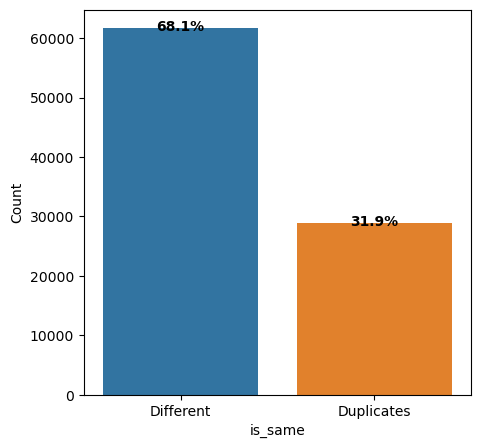

In [10]:
fig, ax = plt.subplots(figsize = (5,5))
sns.countplot(x = "is_same", data = train_data, ax = ax)

for index, value in enumerate(train_data["is_same"].value_counts()):
    label = '{}%'.format(round((value / train_data["is_same"].shape[0]) * 100, 2))
    ax.annotate(label,
               xy = (index, value + 250),
               ha = "center",
               va = "center",
               fontweight = "bold")
ax.set_xticklabels(["Different","Duplicates"])
ax.set_label("is_same")
ax.set_ylabel("Count")

Dataset is imbalanced

### Check urls of images

In [12]:
import requests
import concurrent.futures
import os

count = 0

def check_url(url):
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        return True
    global count
    count += 1  
    return False

def threads_check_images(image_urls):
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = [executor.submit(check_url, url) for url in image_urls]
        for future in concurrent.futures.as_completed(futures):
            try:
                future.result()
            except Exception as e:
                print(f"Exception during checking: {e}")

In [15]:
threads_check_images(list(train_data["image_url1"].values))

In [16]:
threads_check_images(list(train_data["image_url2"].values))

In [18]:
new_train_data = pd.read_csv('/kaggle/input/new-data-lun-csv/new_data_lun.csv')

In [20]:
print(f"Amount of deleted images are {count}")

Amount of deleted images are 1421


Plot some samples

In [21]:
train_data = pd.read_csv('/kaggle/input/new-data-lun-csv/new_data_lun.csv')

In [24]:
dir_img_1 = '/kaggle/input/traindataset/LUN_DataSet/train_url1'
dir_img_2 = '/kaggle/input/traindataset/LUN_DataSet/train_url2'

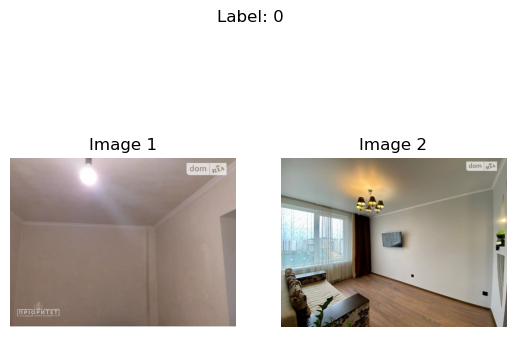

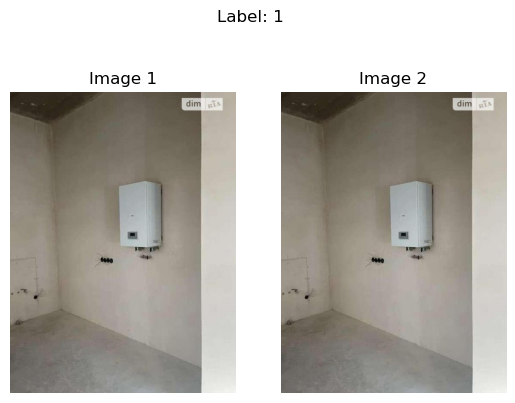

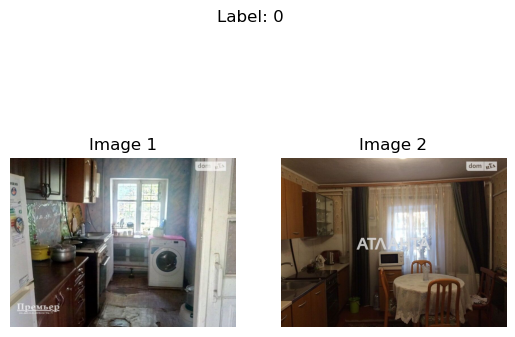

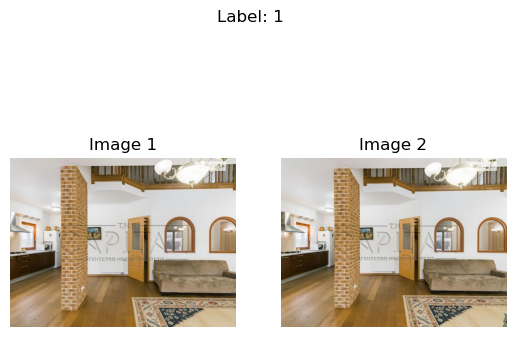

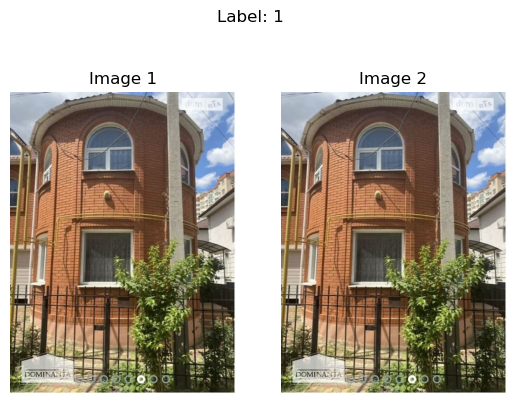

In [30]:
from PIL import Image
import os
import io


num_pairs = 5
for i in range(num_pairs):
    image_url1 = os.path.join(dir_img_1, train_data['image_url1'].iloc[i])
    image_url2 = os.path.join(dir_img_2, train_data['image_url2'].iloc[i])
    label = train_data['is_same'].iloc[i]

    image1 = Image.open(image_url1)
    image2 = Image.open(image_url2)

    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(image1)
    axs[0].axis('off')
    axs[0].set_title('Image 1')

    axs[1].imshow(image2)
    axs[1].axis('off')
    axs[1].set_title('Image 2')

    # Set the label as the title of the plot
    plt.suptitle(f'Label: {label}')

    # Show the plot
    plt.show()